In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
# Importing libraries
from pandas import read_csv
from statsmodels.tsa.stattools import adfuller
import os
import warnings
warnings.filterwarnings('ignore')
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight') 

from pylab import rcParams

import statsmodels.api as sm
from numpy.random import normal, seed
from scipy.stats import norm
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_process import ArmaProcess
from statsmodels.tsa.arima_model import ARIMA
import math
from sklearn.metrics import mean_squared_error

from plotly import tools

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import numpy as np
import pandas as pd
import nltk
from nltk import word_tokenize, pos_tag
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
# import gensim

from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
nltk.download('all')
#nltk.download('punkt')
#nltk.download('stopwords')


auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_p

In [2]:
# Use nltk's English stopwords.
stopwords = nltk.corpus.stopwords.words('english') #stopwords.append("n't")
new_stops=["tablet",'amazon','thing','hd','app','year','apps','store','google']
for i in new_stops:
    stopwords.append(i)

print ("We use " + str(len(stopwords)) + " stop-words from nltk library.")
print (stopwords[:10])

We use 188 stop-words from nltk library.
['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [3]:
def get_wordnet_pos(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return None

def tokenization_and_lemmatization(text):
    tokens = []
    # exclude stop words and tokenize the document, generate a list of string
    #将所有stopwords(无意义)的词语删除
    for word in nltk.word_tokenize(text):
        if word.lower() not in stopwords:
            tokens.append(word.lower())

    filtered_tokens = []
    
    # filter out any tokens not containing letters (e.g., numeric tokens, raw punctuation)
    #将所有数字删除
    for token in tokens:
        if token.isalpha():
            filtered_tokens.append(token)
    
    tags = pos_tag(filtered_tokens) # 获取单词词性
    wnl = WordNetLemmatizer()
    lemmatization = []
    
    #lemmatization
    for tag in tags:
        wordnet_pos = get_wordnet_pos(tag[1]) or wordnet.NOUN
        lemmatization.append(wnl.lemmatize(tag[0], pos=wordnet_pos)) # 词形还原
    
    return lemmatization

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

In [5]:
link = 'https://drive.google.com/open?id=1-4AVRJN0YvMG4zgAnDmM-8JSjiE_MtVh'

fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) 
print(file)
file.GetContentFile('full_dataset.csv') 
full_df  = pd.read_csv('full_dataset.csv')
full_df.shape



GoogleDriveFile({'id': '1-4AVRJN0YvMG4zgAnDmM-8JSjiE_MtVh'})


(19468, 28)

In [6]:
# import topic weight data
link = 'https://drive.google.com/open?id=1KmrNg301N6NEeOXMu5Z8NPVXLdZgcZZA'

fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) 
print(file)
file.GetContentFile('topic_weight_df.csv') 
topic_weight_df  = pd.read_csv('topic_weight_df.csv')
topic_weight_df.shape


GoogleDriveFile({'id': '1KmrNg301N6NEeOXMu5Z8NPVXLdZgcZZA'})


(8, 21)

In [7]:
# import key words of 14 topics
link = 'https://drive.google.com/open?id=1-6R_TtXSfbtdd57BPHQTUbw3l4scKFXg'

fluff, id = link.split('=')
file = drive.CreateFile({'id':id}) 
print(file)
file.GetContentFile('keyword_df.csv') 
keyword_df  = pd.read_csv('keyword_df.csv')
keyword_df.shape

GoogleDriveFile({'id': '1-6R_TtXSfbtdd57BPHQTUbw3l4scKFXg'})


(8, 59)

In [ ]:
full_df.shape

In [ ]:
full_df.head()

In [8]:
full_final = full_df.loc[:, ['Subject_Length', 'Day_length', 'Verified Purchase', 'Subject+Text_body', 'Text_body_Length',
                             'Number of helpful', 'Include video/picture or not', 'Price', 'Sentiment']] 

In [9]:
full_final.loc[full_final['Price'] == 'Unknown', 'Price'] = 87.5

In [10]:
full_final

,Subject_Length,Day_length,Verified Purchase,Subject+Text_body,Text_body_Length,Number of helpful,Include video/picture or not,Price,Sentiment
0,22,1752,1,I like its lightweight I recently purchased th...,574,0,0,87.5,1
1,11,260,1,Poor Design I bought this for a Christmas gift...,1914,9,0,149.99,0
2,14,476,1,Great for kids I bought this for my 6 year old...,454,0,0,69.99,1
3,10,576,1,I like it! I like the tablet. It is a bit smal...,117,0,0,54.99,1
4,17,247,1,Very good product Perfect for what I need,23,0,0,54.99,1
...,...,...,...,...,...,...,...,...,...
19463,11,354,1,Charger???? Battery Doesn't last as long as I ...,109,1,0,219.99,1
19464,26,317,1,Great tablet for your buck I gave this tablet ...,137,0,0,69.99,1
19465,20,274,1,Best tablet for kids I had the previous fire t...,525,0,0,119.99,1
19466,33,1309,1,Very good condition my Ipad Air 2 We are satis...,91,0,0,169,1


In [11]:
full_final['Subject+Text_body_new'] = full_final['Subject+Text_body'].apply(lambda x: tokenization_and_lemmatization(x))

In [12]:
full_final

,Subject_Length,Day_length,Verified Purchase,Subject+Text_body,Text_body_Length,Number of helpful,Include video/picture or not,Price,Sentiment,Subject+Text_body_new
0,22,1752,1,I like its lightweight I recently purchased th...,574,0,0,87.5,1,"[like, lightweight, recently, purchase, produc..."
1,11,260,1,Poor Design I bought this for a Christmas gift...,1914,9,0,149.99,0,"[poor, design, buy, christmas, gift, girlfrien..."
2,14,476,1,Great for kids I bought this for my 6 year old...,454,0,0,69.99,1,"[great, kid, buy, old, son, use, sister, old, ..."
3,10,576,1,I like it! I like the tablet. It is a bit smal...,117,0,0,54.99,1,"[like, like, bit, small, faster, also, like, s..."
4,17,247,1,Very good product Perfect for what I need,23,0,0,54.99,1,"[good, product, perfect, need]"
...,...,...,...,...,...,...,...,...,...,...
19463,11,354,1,Charger???? Battery Doesn't last as long as I ...,109,1,0,219.99,1,"[charger, battery, last, long, think, think, s..."
19464,26,317,1,Great tablet for your buck I gave this tablet ...,137,0,0,69.99,1,"[great, buck, give, niece, birthday, expect, q..."
19465,20,274,1,Best tablet for kids I had the previous fire t...,525,0,0,119.99,1,"[best, kid, previous, fire, nothing, right, ho..."
19466,33,1309,1,Very good condition my Ipad Air 2 We are satis...,91,0,0,169,1,"[good, condition, ipad, air, satisfy, ipad, ai..."


In [13]:
full_list = full_final['Subject+Text_body_new'].to_list()

In [14]:
element = []
for i in full_final['Subject+Text_body_new']:
  element.append(len(i))

In [15]:
full_final['Number of words'] = element
full_final

,Subject_Length,Day_length,Verified Purchase,Subject+Text_body,Text_body_Length,Number of helpful,Include video/picture or not,Price,Sentiment,Subject+Text_body_new,Number of words
0,22,1752,1,I like its lightweight I recently purchased th...,574,0,0,87.5,1,"[like, lightweight, recently, purchase, produc...",53
1,11,260,1,Poor Design I bought this for a Christmas gift...,1914,9,0,149.99,0,"[poor, design, buy, christmas, gift, girlfrien...",145
2,14,476,1,Great for kids I bought this for my 6 year old...,454,0,0,69.99,1,"[great, kid, buy, old, son, use, sister, old, ...",40
3,10,576,1,I like it! I like the tablet. It is a bit smal...,117,0,0,54.99,1,"[like, like, bit, small, faster, also, like, s...",9
4,17,247,1,Very good product Perfect for what I need,23,0,0,54.99,1,"[good, product, perfect, need]",4
...,...,...,...,...,...,...,...,...,...,...,...
19463,11,354,1,Charger???? Battery Doesn't last as long as I ...,109,1,0,219.99,1,"[charger, battery, last, long, think, think, s...",10
19464,26,317,1,Great tablet for your buck I gave this tablet ...,137,0,0,69.99,1,"[great, buck, give, niece, birthday, expect, q...",10
19465,20,274,1,Best tablet for kids I had the previous fire t...,525,0,0,119.99,1,"[best, kid, previous, fire, nothing, right, ho...",41
19466,33,1309,1,Very good condition my Ipad Air 2 We are satis...,91,0,0,169,1,"[good, condition, ipad, air, satisfy, ipad, ai...",12


In [16]:
# We only consider the documents with more than 2 words
full_final = full_final[full_final['Number of words'] > 2]
full_final = full_final.reset_index()
full_final

,index,Subject_Length,Day_length,Verified Purchase,Subject+Text_body,Text_body_Length,Number of helpful,Include video/picture or not,Price,Sentiment,Subject+Text_body_new,Number of words
0,0,22,1752,1,I like its lightweight I recently purchased th...,574,0,0,87.5,1,"[like, lightweight, recently, purchase, produc...",53
1,1,11,260,1,Poor Design I bought this for a Christmas gift...,1914,9,0,149.99,0,"[poor, design, buy, christmas, gift, girlfrien...",145
2,2,14,476,1,Great for kids I bought this for my 6 year old...,454,0,0,69.99,1,"[great, kid, buy, old, son, use, sister, old, ...",40
3,3,10,576,1,I like it! I like the tablet. It is a bit smal...,117,0,0,54.99,1,"[like, like, bit, small, faster, also, like, s...",9
4,4,17,247,1,Very good product Perfect for what I need,23,0,0,54.99,1,"[good, product, perfect, need]",4
...,...,...,...,...,...,...,...,...,...,...,...,...
19083,19463,11,354,1,Charger???? Battery Doesn't last as long as I ...,109,1,0,219.99,1,"[charger, battery, last, long, think, think, s...",10
19084,19464,26,317,1,Great tablet for your buck I gave this tablet ...,137,0,0,69.99,1,"[great, buck, give, niece, birthday, expect, q...",10
19085,19465,20,274,1,Best tablet for kids I had the previous fire t...,525,0,0,119.99,1,"[best, kid, previous, fire, nothing, right, ho...",41
19086,19466,33,1309,1,Very good condition my Ipad Air 2 We are satis...,91,0,0,169,1,"[good, condition, ipad, air, satisfy, ipad, ai...",12


In [17]:
def joinListWord(list):
  outString = ' '.join(list)
  return outString

In [18]:
full_final['Subject+Text_body_join'] = full_final['Subject+Text_body_new'].apply(lambda x: joinListWord(x))

In [19]:
full_final.drop(['Subject+Text_body', 'Subject+Text_body_new', 'Number of words', 'index'], axis=1, inplace=True)
full_final

,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,Sentiment,Subject+Text_body_join
0,22,1752,1,574,0,0,87.5,1,like lightweight recently purchase product mus...
1,11,260,1,1914,9,0,149.99,0,poor design buy christmas gift girlfriend disl...
2,14,476,1,454,0,0,69.99,1,great kid buy old son use sister old fire slow...
3,10,576,1,117,0,0,54.99,1,like like bit small faster also like stand come
4,17,247,1,23,0,0,54.99,1,good product perfect need
...,...,...,...,...,...,...,...,...,...
19083,11,354,1,109,1,0,219.99,1,charger battery last long think think special ...
19084,26,317,1,137,0,0,69.99,1,great buck give niece birthday expect quality ...
19085,20,274,1,525,0,0,119.99,1,best kid previous fire nothing right home oper...
19086,33,1309,1,91,0,0,169,1,good condition ipad air satisfy ipad air good ...


In [20]:
index_list = list(full_final.index)
len(index_list)

19088

In [21]:
def get_tfdict(doc):
  feature_name = []
  tf_dict = {}
  cv = CountVectorizer(ngram_range = (2,3))
  cv_fit=cv.fit_transform([doc])
  feature_name = cv.get_feature_names()
  tf_list = list(cv_fit.toarray().flatten())
  tf_dict = dict(zip(feature_name,tf_list))
  return tf_dict

In [22]:
tf_all = []
for i in range(len(index_list)):
  tf_all.append(get_tfdict(full_final['Subject+Text_body_join'][i]))

In [23]:
len(tf_all)

19088

In [24]:
len(index_list)

19088

In [25]:
tf_dict = {}
tf_dict = dict(zip(index_list, tf_all))
tf_dict

{0: {'added bonus': 1,
  'added bonus movie': 1,
  'already unresponsive': 1,
  'already unresponsive aware': 1,
  'also like': 1,
  'also like take': 1,
  'anywhere read': 1,
  'anywhere read day': 1,
  'aware buy': 1,
  'aware buy get': 1,
  'bonus movie': 1,
  'bonus movie also': 1,
  'book plus': 1,
  'book plus added': 1,
  'buy get': 1,
  'buy get work': 1,
  'day night': 1,
  'day night really': 1,
  'easy use': 1,
  'easy use get': 1,
  'favorite book': 1,
  'favorite book plus': 1,
  'fire like': 1,
  'fire like lightweight': 1,
  'fro mom': 1,
  'fro mom update': 1,
  'get favorite': 1,
  'get favorite book': 1,
  'get work': 1,
  'get work life': 1,
  'happy purchase': 1,
  'happy purchase one': 1,
  'item stop': 1,
  'item stop work': 1,
  'kindle fire': 1,
  'kindle fire like': 1,
  'later item': 1,
  'later item stop': 1,
  'life span': 1,
  'lightweight easy': 1,
  'lightweight easy use': 1,
  'lightweight recently': 1,
  'lightweight recently purchase': 1,
  'like light

In [26]:
tf_dict.keys()

dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219,

In [ ]:
#keyword_df.drop("Unnamed: 0",axis=1, inplace = True)

In [27]:
keyword_df.shape

(8, 59)

In [28]:
keyword_df

,Unnamed: 0,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,...,Word 48,Word 49,Word 50,Word 51,Word 52,Word 53,Word 54,Word 55,Word 56,Word 57
0,0,battery life,customer service,old kindle,parental control,watch movie,stop charge,watch video,prime day,long time,...,power button,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,home screen,charge port,read book,work great,new kindle,brand new,want use,feel like,factory reset,...,able use,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,touch screen,play game,work fine,buy new,lock screen,user friendly,ca use,tech support,kindle book,...,hold charge,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,sd card,stop work,waste money,hold charge,screen quality,use kindle,year ago,prime video,really like,...,user friendly,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,battery life,easy use,highly recommend,great value,kid love,parental control,long time,use read,absolutely love,...,old love,love new,daughter love,love kindle,great product,son love,old kindle,work fine,far good,good product
5,5,read book,screen quality,watch movie,touch screen,like new,sd card,good price,love kindle,great kid,...,good quality,life good,love love,customer service,battery life good,great product,good product,far good,brand new,great great
6,6,work great,love love,prime day,love new,large screen,work fine,brand new,far good,watch video,...,parental control,son love,good battery,old love,daughter love,great product,great battery life,life good,good quality,battery life good
7,7,great product,great price,play game,really like,old kindle,great buy,daughter love,new kindle,son love,...,great kid,work fine,love love,long battery,screen size,brand new,good battery,life great,far good,life good


In [29]:
keyword_df = keyword_df.iloc[:,:20]
keyword_df

,Unnamed: 0,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18
0,0,battery life,customer service,old kindle,parental control,watch movie,stop charge,watch video,prime day,long time,easy use,look like,buy kindle,save money,new kindle,read book,screen quality,prime video,year ago,pretty good
1,1,home screen,charge port,read book,work great,new kindle,brand new,want use,feel like,factory reset,make sure,kid profile,silk browser,year old,use read,parental control,use kindle,old kindle,watch video,buy kindle
2,2,touch screen,play game,work fine,buy new,lock screen,user friendly,ca use,tech support,kindle book,use kindle,watch movie,buy kindle,watch video,new kindle,factory reset,use read,battery life,home screen,easy use
3,3,sd card,stop work,waste money,hold charge,screen quality,use kindle,year ago,prime video,really like,use device,power button,able use,pretty good,battery life,want use,buy kindle,new kindle,watch movie,prime day
4,4,battery life,easy use,highly recommend,great value,kid love,parental control,long time,use read,absolutely love,happy purchase,great battery,pretty good,good battery,life great,battery life great,great battery life,life good,battery life good,screen quality
5,5,read book,screen quality,watch movie,touch screen,like new,sd card,good price,love kindle,great kid,easy set,big screen,use kindle,old love,long battery,great screen,play game,battery life,use read,quality great
6,6,work great,love love,prime day,love new,large screen,work fine,brand new,far good,watch video,screen protector,screen size,great great,kindle book,price great,new kindle,happy purchase,play game,battery life,use read
7,7,great product,great price,play game,really like,old kindle,great buy,daughter love,new kindle,son love,good quality,good product,customer service,quality great,great deal,price great,battery life,use read,highly recommend,screen quality


In [30]:
topic_weight_df.drop('Unnamed: 0', axis = 1, inplace = True)

In [31]:
topic_weight_df

,Word 0,Word 1,Word 2,Word 3,Word 4,Word 5,Word 6,Word 7,Word 8,Word 9,Word 10,Word 11,Word 12,Word 13,Word 14,Word 15,Word 16,Word 17,Word 18,Word 19
0,0.279352,0.153583,0.070632,0.065424,0.057475,0.052819,0.050551,0.049161,0.045765,0.043381,0.042426,0.041161,0.040500,0.004001,0.000109,0.000109,0.000108,0.000108,0.000108,0.000108
1,0.113151,0.110574,0.105451,0.084079,0.074681,0.071592,0.070860,0.067328,0.055192,0.054129,0.051764,0.048990,0.044580,0.043167,0.000345,0.000123,0.000122,0.000122,0.000122,0.000122
2,0.166746,0.166108,0.140443,0.116690,0.100088,0.093459,0.072190,0.069483,0.067236,0.001103,0.000169,0.000167,0.000167,0.000167,0.000167,0.000166,0.000166,0.000166,0.000166,0.000166
3,0.162899,0.125294,0.122440,0.105136,0.061876,0.060581,0.056910,0.053289,0.053283,0.051622,0.049913,0.048820,0.043114,0.000210,0.000133,0.000133,0.000133,0.000132,0.000132,0.000132
4,0.235401,0.149604,0.064144,0.060460,0.054088,0.048979,0.044567,0.043500,0.042273,0.037497,0.031723,0.031256,0.029049,0.027781,0.027482,0.024723,0.023514,0.022522,0.000257,0.000189
5,0.102185,0.093854,0.089157,0.084607,0.070893,0.069106,0.061428,0.058972,0.057383,0.057191,0.054915,0.047021,0.044152,0.035870,0.034200,0.026989,0.010646,0.000175,0.000033,0.000030
6,0.193391,0.085072,0.077086,0.072047,0.067390,0.064809,0.064556,0.062088,0.059554,0.053759,0.051398,0.051082,0.049721,0.027468,0.018945,0.000053,0.000038,0.000036,0.000036,0.000035
7,0.126631,0.120678,0.097188,0.088467,0.068739,0.066868,0.062281,0.057202,0.056485,0.054085,0.052021,0.047694,0.041779,0.041546,0.016858,0.000033,0.000032,0.000032,0.000032,0.000032


In [32]:
matrix_weight = topic_weight_df.to_numpy()

In [33]:
matrix_weight.shape

(8, 20)

In [34]:
matrix_df = keyword_df.to_numpy()

In [35]:
matrix_df

array([[0, 'battery life', 'customer service', 'old kindle',
        'parental control', 'watch movie', 'stop charge', 'watch video',
        'prime day', 'long time', 'easy use', 'look like', 'buy kindle',
        'save money', 'new kindle', 'read book', 'screen quality',
        'prime video', 'year ago', 'pretty good'],
       [1, 'home screen', 'charge port', 'read book', 'work great',
        'new kindle', 'brand new', 'want use', 'feel like',
        'factory reset', 'make sure', 'kid profile', 'silk browser',
        'year old', 'use read', 'parental control', 'use kindle',
        'old kindle', 'watch video', 'buy kindle'],
       [2, 'touch screen', 'play game', 'work fine', 'buy new',
        'lock screen', 'user friendly', 'ca use', 'tech support',
        'kindle book', 'use kindle', 'watch movie', 'buy kindle',
        'watch video', 'new kindle', 'factory reset', 'use read',
        'battery life', 'home screen', 'easy use'],
       [3, 'sd card', 'stop work', 'waste mone

In [36]:
newDict = {}
for id in tf_dict.keys():  # Get doc ID
  newDict.update({id : {}})
  docMap = tf_dict.get(id)
  for i in range(len(matrix_df)): # each topic
    scoreThisLine = 0
    for j in range(len(matrix_df[0])): # each unique word for each topic    # assign different weights for different unique words according to their rank of importance
      cellValue = docMap.get(matrix_df[i][j])
      if cellValue == None:
        cellValue = 0
      scoreThisLine = scoreThisLine + cellValue * matrix_weight[i][j]
#      scoreThisLine = np.round(scoreThisLine, 2)
    newDict.get(id).update({i : scoreThisLine})

In [ ]:
# newDict = {}
# for id in tf_dict.keys():  # Get doc ID
#   newDict.update({id : {}})
#   docMap = tf_dict.get(id)
#   for i in range(len(matrix_df)): # each topic
#     scoreThisLine = 0
#     for j in range(len(matrix_df[0])): # each unique word for each topic
#       weight = 0.5/53                  # assign different weights for different unique words according to their rank of importance
#       if j == 0:
#         weight = 0.18
#       elif j == 1:
#         weight = 0.14
#       elif j == 2:
#         weight = 0.10
#       elif j == 3:
#         weight = 0.06
#       elif j == 4:
#         weight = 0.02
#       cellValue = docMap.get(matrix_df[i][j])
#       if cellValue == None:
#         cellValue = 0
#       scoreThisLine = scoreThisLine + cellValue * weight
#       scoreThisLine = np.round(scoreThisLine, 2)

#     newDict.get(id).update({i : scoreThisLine})

In [37]:
newDict

{0: {0: 0.0424257921076521,
  1: 0.0,
  2: 0.0001658666569652,
  3: 0.1224404269425149,
  4: 0.0958673764699073,
  5: 0.0,
  6: 3.775721057167995e-05,
  7: 0.0},
 1: {0: 0.000108245246498,
  1: 0.0,
  2: 0.0,
  3: 0.0532828927106642,
  4: 0.0,
  5: 0.0,
  6: 0.0,
  7: 0.0},
 2: {0: 0.0,
  1: 0.0,
  2: 0.1661081725739653,
  3: 0.0,
  4: 0.0374974424937514,
  5: 0.1751042438057781,
  6: 0.1184724386446322,
  7: 0.0},
 3: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0},
 4: {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.0,
  4: 0.0,
  5: 0.0,
  6: 0.0,
  7: 0.0476935290455818},
 5: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0},
 6: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0},
 7: {0: 0.0,
  1: 0.0,
  2: 0.0,
  3: 0.0,
  4: 0.0489788861231893,
  5: 0.0,
  6: 0.0,
  7: 0.0},
 8: {0: 0.0, 1: 0.0, 2: 0.0, 3: 0.0, 4: 0.0, 5: 0.0, 6: 0.0, 7: 0.0},
 9: {0: 0.0,
  1: 0.0,
  2: 0.1404430244687737,
  3: 0.0,
  4: 0.0,
  5: 0.0576664932695954,
  6: 3.607

In [38]:
len(newDict)

19088

In [39]:
full_final

,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,Sentiment,Subject+Text_body_join
0,22,1752,1,574,0,0,87.5,1,like lightweight recently purchase product mus...
1,11,260,1,1914,9,0,149.99,0,poor design buy christmas gift girlfriend disl...
2,14,476,1,454,0,0,69.99,1,great kid buy old son use sister old fire slow...
3,10,576,1,117,0,0,54.99,1,like like bit small faster also like stand come
4,17,247,1,23,0,0,54.99,1,good product perfect need
...,...,...,...,...,...,...,...,...,...
19083,11,354,1,109,1,0,219.99,1,charger battery last long think think special ...
19084,26,317,1,137,0,0,69.99,1,great buck give niece birthday expect quality ...
19085,20,274,1,525,0,0,119.99,1,best kid previous fire nothing right home oper...
19086,33,1309,1,91,0,0,169,1,good condition ipad air satisfy ipad air good ...


In [40]:
def indexToTF(TextIndex, topicIndex):
  value = 0
  if newDict.get(TextIndex) == None:
    value = 0
  else:
    value = newDict.get(TextIndex).get(topicIndex)
  return value

In [41]:
full_final.index_new = full_final.index.to_series()

In [42]:
type(full_final.index)

pandas.core.indexes.range.RangeIndex

In [43]:
full_final['topic0_TF'] = full_final.index.to_series().apply(lambda x: indexToTF(x, 0))

In [44]:
full_final['topic1_TF'] = full_final.index.to_series().apply(lambda x: indexToTF(x, 1))

In [45]:
full_final['topic2_TF'] = full_final.index.to_series().apply(lambda x: indexToTF(x, 2))

In [46]:
full_final['topic3_TF'] = full_final.index.to_series().apply(lambda x: indexToTF(x, 3))

In [47]:
full_final['topic4_TF'] = full_final.index.to_series().apply(lambda x: indexToTF(x, 4))

In [48]:
full_final['topic5_TF'] = full_final.index.to_series().apply(lambda x: indexToTF(x, 5))

In [49]:
full_final['topic6_TF'] = full_final.index.to_series().apply(lambda x: indexToTF(x, 6))

In [50]:
full_final['topic7_TF'] = full_final.index.to_series().apply(lambda x: indexToTF(x, 7))

In [51]:
full_final

,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,Sentiment,Subject+Text_body_join,topic0_TF,topic1_TF,topic2_TF,topic3_TF,topic4_TF,topic5_TF,topic6_TF,topic7_TF
0,22,1752,1,574,0,0,87.5,1,like lightweight recently purchase product mus...,0.042426,0.0,0.000166,0.122440,0.095867,0.000000,0.000038,0.000000
1,11,260,1,1914,9,0,149.99,0,poor design buy christmas gift girlfriend disl...,0.000108,0.0,0.000000,0.053283,0.000000,0.000000,0.000000,0.000000
2,14,476,1,454,0,0,69.99,1,great kid buy old son use sister old fire slow...,0.000000,0.0,0.166108,0.000000,0.037497,0.175104,0.118472,0.000000
3,10,576,1,117,0,0,54.99,1,like like bit small faster also like stand come,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,17,247,1,23,0,0,54.99,1,good product perfect need,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.047694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19083,11,354,1,109,1,0,219.99,1,charger battery last long think think special ...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19084,26,317,1,137,0,0,69.99,1,great buck give niece birthday expect quality ...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19085,20,274,1,525,0,0,119.99,1,best kid previous fire nothing right home oper...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19086,33,1309,1,91,0,0,169,1,good condition ipad air satisfy ipad air good ...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [52]:
full_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19088 entries, 0 to 19087
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Subject_Length                19088 non-null  int64  
 1   Day_length                    19088 non-null  int64  
 2   Verified Purchase             19088 non-null  int64  
 3   Text_body_Length              19088 non-null  int64  
 4   Number of helpful             19088 non-null  int64  
 5   Include video/picture or not  19088 non-null  int64  
 6   Price                         19088 non-null  object 
 7   Sentiment                     19088 non-null  int64  
 8   Subject+Text_body_join        19088 non-null  object 
 9   topic0_TF                     19088 non-null  float64
 10  topic1_TF                     19088 non-null  float64
 11  topic2_TF                     19088 non-null  float64
 12  topic3_TF                     19088 non-null  float64
 13  t

In [53]:
full_final = full_final.drop(['Subject+Text_body_join'], axis = 1)
full_final['Price'] = full_final['Price'].astype('float')

In [54]:
full_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19088 entries, 0 to 19087
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Subject_Length                19088 non-null  int64  
 1   Day_length                    19088 non-null  int64  
 2   Verified Purchase             19088 non-null  int64  
 3   Text_body_Length              19088 non-null  int64  
 4   Number of helpful             19088 non-null  int64  
 5   Include video/picture or not  19088 non-null  int64  
 6   Price                         19088 non-null  float64
 7   Sentiment                     19088 non-null  int64  
 8   topic0_TF                     19088 non-null  float64
 9   topic1_TF                     19088 non-null  float64
 10  topic2_TF                     19088 non-null  float64
 11  topic3_TF                     19088 non-null  float64
 12  topic4_TF                     19088 non-null  float64
 13  t

In [55]:
full_final

,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,Sentiment,topic0_TF,topic1_TF,topic2_TF,topic3_TF,topic4_TF,topic5_TF,topic6_TF,topic7_TF
0,22,1752,1,574,0,0,87.50,1,0.042426,0.0,0.000166,0.122440,0.095867,0.000000,0.000038,0.000000
1,11,260,1,1914,9,0,149.99,0,0.000108,0.0,0.000000,0.053283,0.000000,0.000000,0.000000,0.000000
2,14,476,1,454,0,0,69.99,1,0.000000,0.0,0.166108,0.000000,0.037497,0.175104,0.118472,0.000000
3,10,576,1,117,0,0,54.99,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,17,247,1,23,0,0,54.99,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.047694
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19083,11,354,1,109,1,0,219.99,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19084,26,317,1,137,0,0,69.99,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19085,20,274,1,525,0,0,119.99,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19086,33,1309,1,91,0,0,169.00,1,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [56]:
full_final[19070:19086]

,Subject_Length,Day_length,Verified Purchase,Text_body_Length,Number of helpful,Include video/picture or not,Price,Sentiment,topic0_TF,topic1_TF,topic2_TF,topic3_TF,topic4_TF,topic5_TF,topic6_TF,topic7_TF
19070,30,539,1,227,0,0,54.99,1,0.113058,0.000000,0.000166,0.000000,0.118233,0.000000,0.000000,0.138968
19071,24,86,1,56,0,0,149.99,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19072,27,868,1,247,0,0,24.99,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.120678
19073,66,806,1,359,1,0,87.50,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19074,17,64,1,496,1,0,149.99,1,0.000108,0.000000,0.000000,0.060581,0.000189,0.089157,0.064809,0.000032
19075,8,788,1,581,9,0,169.00,1,0.000000,0.070860,0.116690,0.000000,0.031723,0.000000,0.126682,0.000000
19076,32,13,1,56,0,0,89.99,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19077,42,411,1,256,0,0,69.99,1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
19078,21,231,1,1076,0,0,219.99,1,0.000109,0.071714,0.000336,0.057042,0.000000,0.044152,0.000053,0.056485
19079,30,1098,1,639,9,0,169.00,1,0.000000,0.149361,0.000000,0.000000,0.000000,0.000000,0.170143,0.000000


In [57]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc, confusion_matrix, roc_auc_score, recall_score, precision_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import RepeatedStratifiedKFold
import keras
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout
from sklearn import metrics
import tensorflow
from tensorflow.python.keras.utils import np_utils
from keras.utils.np_utils import *

In [58]:
def report_results(model, X, y):
    pred_proba = model.predict_proba(X)[:, 1]
    pred = model.predict(X)        

    auc = roc_auc_score(y, pred_proba)
    acc = accuracy_score(y, pred)
    f1 = f1_score(y, pred)
    prec = precision_score(y, pred)
    rec = recall_score(y, pred)
    result = {'auc': auc, 'f1': f1, 'acc': acc, 'precision': prec, 'recall': rec}
    return result

In [59]:
X_full = full_final.drop(columns = 'Sentiment', axis = 1)
y_full = full_final['Sentiment']

In [60]:
y_full.value_counts().to_frame()

,Sentiment
1,14983
0,4105


In [61]:
# Test train data split for modeling, stratify = topic
X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, train_size = 0.8,
                                                    stratify = y_full, random_state = 1)

In [62]:
scaler = MinMaxScaler()
scaler.fit(X_train)

MinMaxScaler()

In [63]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [64]:
X_train.shape

(15270, 15)

 Random Forest

In [65]:
from sklearn.ensemble import RandomForestClassifier

In [66]:
rfc = RandomForestClassifier()

In [67]:
param_grid = {
              'max_features':np.arange(5,7),
              'n_estimators':np.arange(100,500,800)}
GS = GridSearchCV(rfc, param_grid, cv=5)
GS.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_features': array([5, 6]),
                         'n_estimators': array([100])})

In [68]:
GS.best_params_

{'max_features': 5, 'n_estimators': 100}

In [69]:
classifier = RandomForestClassifier(**GS.best_params_)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_score = classifier.predict_proba(X_test)[:,1]
y_score = classifier.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr,tpr)

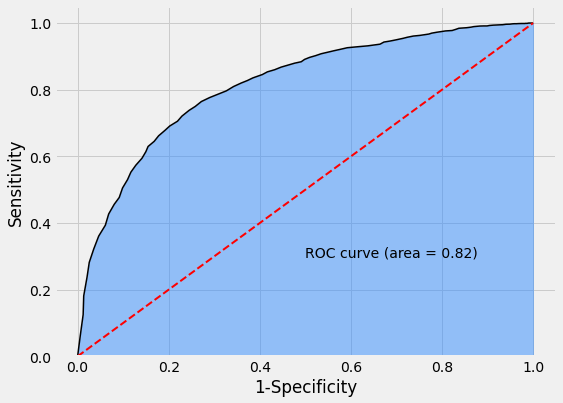

In [70]:
f,ax = plt.subplots(figsize=(8,6))
plt.stackplot(fpr, tpr, color='#338DFF', alpha = 0.5, edgecolor = 'black')
plt.plot(fpr, tpr, color='black', lw = 1.5)
plt.plot([0,1],[0,1], color = 'red', linestyle = '--', lw = 2)
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [71]:
report_results(classifier, X_test, y_test)

{'auc': 0.8159883391308482,
 'f1': 0.8857779191854915,
 'acc': 0.8119434258774227,
 'precision': 0.8464578899361508,
 'recall': 0.928928928928929}

In [72]:
metrics.f1_score(y_test, y_pred ,average='macro')

0.6769630336668199

Logistic Regression

In [73]:
from sklearn.linear_model import LogisticRegression

In [74]:
params = {'C':[0.0001, 1, 100, 1000],
          'max_iter':[1, 10, 100, 500],
          'class_weight':['balanced', None],
          'solver':['liblinear','sag','lbfgs','newton-cg']
         }
lr = LogisticRegression()
clf = GridSearchCV(lr, param_grid=params, cv=10)
clf.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.0001, 1, 100, 1000],
                         'class_weight': ['balanced', None],
                         'max_iter': [1, 10, 100, 500],
                         'solver': ['liblinear', 'sag', 'lbfgs', 'newton-cg']})

In [75]:
clf.best_params_

{'C': 1000, 'class_weight': None, 'max_iter': 100, 'solver': 'sag'}

In [76]:
classifier = LogisticRegression(**clf.best_params_)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_score = classifier.predict_proba(X_test)[:,1]
y_score = classifier.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr,tpr)

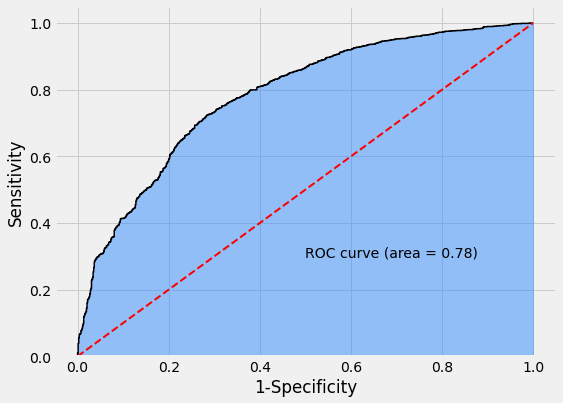

In [77]:
f,ax = plt.subplots(figsize=(8,6))
plt.stackplot(fpr, tpr, color='#338DFF', alpha = 0.5, edgecolor = 'black')
plt.plot(fpr, tpr, color='black', lw = 1.5)
plt.plot([0,1],[0,1], color = 'red', linestyle = '--', lw = 2)
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [78]:
metrics.f1_score(y_test, y_pred ,average='macro')

0.6074951481628211

In [79]:
report_results(classifier, X_test, y_test)

{'auc': 0.7822971164424677,
 'f1': 0.8871214438666258,
 'acc': 0.8067050811943426,
 'precision': 0.8189776899181023,
 'recall': 0.9676343009676343}

Naive Bayes

In [80]:
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV

In [81]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}
nbModel_grid = GridSearchCV(estimator=GaussianNB(), param_grid=param_grid_nb, verbose=1, cv=10, n_jobs=-1)
nbModel_grid.fit(X_train, y_train)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits


GridSearchCV(cv=10, estimator=GaussianNB(), n_jobs=-1,
             param_grid={'var_smoothing': array([1.00000000e+00, 8.11130831e-01, 6.57933225e-01, 5.33669923e-01,
       4.32876128e-01, 3.51119173e-01, 2.84803587e-01, 2.31012970e-01,
       1.87381742e-01, 1.51991108e-01, 1.23284674e-01, 1.00000000e-01,
       8.11130831e-02, 6.57933225e-02, 5.33669923e-02, 4.32876128e-02,
       3.51119173e-02, 2.848035...
       1.23284674e-07, 1.00000000e-07, 8.11130831e-08, 6.57933225e-08,
       5.33669923e-08, 4.32876128e-08, 3.51119173e-08, 2.84803587e-08,
       2.31012970e-08, 1.87381742e-08, 1.51991108e-08, 1.23284674e-08,
       1.00000000e-08, 8.11130831e-09, 6.57933225e-09, 5.33669923e-09,
       4.32876128e-09, 3.51119173e-09, 2.84803587e-09, 2.31012970e-09,
       1.87381742e-09, 1.51991108e-09, 1.23284674e-09, 1.00000000e-09])},
             verbose=1)

In [82]:
nbModel_grid.best_estimator_

GaussianNB(var_smoothing=1.0)

In [89]:
classifier = GaussianNB(var_smoothing=1.0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)
y_score = classifier.predict_proba(X_test)[:,1]
y_score = classifier.predict_proba(X_test)[:,1]
fpr,tpr,threshold = metrics.roc_curve(y_test, y_score)
roc_auc = metrics.auc(fpr,tpr)

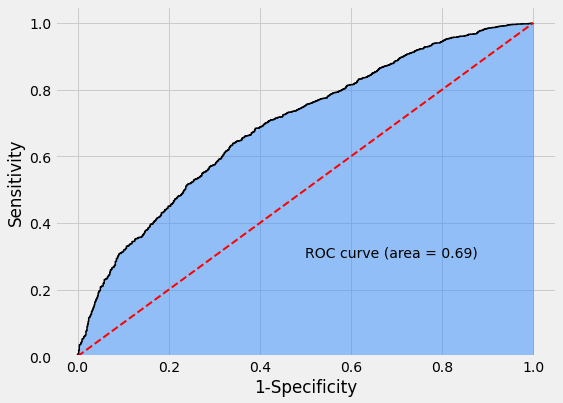

In [90]:
f,ax = plt.subplots(figsize=(8,6))
plt.stackplot(fpr, tpr, color='#338DFF', alpha = 0.5, edgecolor = 'black')
plt.plot(fpr, tpr, color='black', lw = 1.5)
plt.plot([0,1],[0,1], color = 'red', linestyle = '--', lw = 2)
plt.text(0.5,0.3,'ROC curve (area = %0.2f)' % roc_auc)
plt.xlabel('1-Specificity')
plt.ylabel('Sensitivity')
plt.show()

In [91]:
report_results(classifier, X_test, y_test)

{'auc': 0.6949865009142313,
 'f1': 0.8772885459222273,
 'acc': 0.7875851231011001,
 'precision': 0.8026024363233666,
 'recall': 0.9673006339673006}

In [92]:
metrics.f1_score(y_test, y_pred, average='macro')

0.543804935083801

In [86]:
from sklearn.naive_bayes import BernoulliNB

In [88]:
def naive_beyas_modeling(random):
  X_train, X_test, y_train, y_test = train_test_split(X_full, y_full, train_size = 0.8,
                                                    stratify = y_full, random_state = random)
  naive_model = BernoulliNB()
  naive_model = naive_model.fit(X_train, y_train)
  y_test_pred_nb = naive_model.predict(X_test)
  f1_macro_for_each_class=metrics.f1_score(y_test,y_test_pred_nb,average='macro')
  avg_f1_macro=np.mean(f1_macro_for_each_class)

  return avg_f1_macro

In [ ]:
import random
a=[random.randint(0,1000) for x in range(30)]
b=list(a)
b

[500,
 876,
 531,
 102,
 870,
 340,
 87,
 295,
 767,
 125,
 625,
 910,
 813,
 783,
 291,
 916,
 871,
 567,
 115,
 483,
 740,
 631,
 605,
 258,
 539,
 198,
 498,
 713,
 865,
 300]

In [ ]:
nb_f1 = []
for i in b:
    macro=naive_beyas_modeling(i)
    print(macro)
    nb_f1.append(macro)

0.5578947074711489
0.5641916137341799
0.504575385113341
0.5053252380530653
0.5481173682956604
0.5168598493417929
0.5787539775637138
0.5007147111375818
0.5739415575721866
0.563281499274564
0.5678675567833027
0.518253597834379
0.5434397698178702
0.5030086676673022
0.5031603212373587
0.5718462095637391
0.5747712457614771
0.5777061018860116
0.5065835173306401
0.504881987196581
0.5865153184685853
0.4999518342570599
0.5694741396283112
0.5677688933599658
0.5017183625527472
0.5625868271049791
0.5708278539734448
0.5690927599281428
0.5184196981961846
0.574129814767265


In [ ]:
avg_f1_nb=sum(nb_f1)/len(nb_f1)
avg_f1_nb

0.5435220128290861

In [ ]:
avg_f1_nb=0.5333052407574939

In [ ]:
test_f1_nn=[0.8133,
            0.8146,
            0.8149,
            0.8093,
            0.8121,
            0.8162,
            0.8113,
            0.8142,
            0.8156,
            0.8082,
            0.8137,
            0.8154,
            0.8144,
            0.8136,
            0.8125,
            0.8107,
            0.8151,
            0.8167,
            0.7586,
            0.8118,
            0.8062,
            0.8143,
            0.8137,
            0.8131,
            0.8092,
            0.8039,
            0.8062,
            0.8143,
            0.8137,
            0.8131   
]

In [ ]:
avg_f1_nn=sum(test_f1_nn)/len(test_f1_nn)
avg_f1_nn

0.8106633333333332

In [ ]:
import scipy.stats as stats
from scipy.stats import ttest_ind
stat_val, p_val = stats.ttest_ind(test_f1_nn,nb_f1,alternative='greater')
print("p_value is:",p_val)

p_value is: 1.678496695766361e-46
